In [63]:
# El objetivo de esta tarea es:
# 1) Implementar convolucion (usando cython)
# 2) Implementar piramides de Gauss y Laplace
# 3) Implementar reconstruccion de una imagen a partir de las piramides
# 4) Graficar las piramides
#
# Nota: los arreglos (matrices) creados deben ser de tipo np.float32

time: 945 µs


In [2]:
# Si se usa colaboratory, esta linea permite subir imagenes a la carpeta del notebook
from google.colab import files
uploaded = files.upload()

Saving madera.png to madera.png


In [64]:
# Mostrar archivos en la carpeta del notebook
!ls

madera.png  sample_data
time: 110 ms


In [4]:
# Para medir tiempo de ejecucion
!pip install ipython-autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1831 sha256=15076789bc256a9ce41eb7135218d3146f843c5e890f9c6b858283ca04148228
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [65]:
# Extensiones
%load_ext Cython
%load_ext autotime

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.6 ms


In [6]:
# Paquetes a ser usados
import numpy as np
import cv2
import cython
import numpy as np
import math
# Este paquete solo se debe usar si se usa colaboratory
from google.colab.patches import cv2_imshow

time: 472 ms


In [66]:
%%cython
import cython
import numpy as np
cimport numpy as np

# La convolucion debe ser implementada usando cython (solo esta funcion en cython)
#@cython.boundscheck(False)
cpdef float[:, :] convolution_cython(float [:, :] input, float [:, :] mask):
  cdef int r, c, rows, cols
  cdef float sum
  cdef np.ndarray output=np.zeros(input.shape, dtype = np.float32)

  # tamano de la imagen
  rows = input.shape[0]
  cols = input.shape[1]

  sum = 0

  # Por hacer: implementar convolucion entre "input" y "mask"
  for r in range(rows):
    for c in range(cols):
      sum = sum + input[r,c]
      output[r, c] = input[r,c]
  return output


time: 3.06 ms


In [88]:
def compute_gauss_horiz(sigma, width):
	mask = np.zeros((1, width), np.float32)
	# Por hacer: implementar calculo de mascara gaussiana horizontal pixel a pixel
	# Se debe normalizar tras calcularla para que las sumas de los pixeles sea igual a 1
	return mask


time: 3 ms


In [85]:
def compute_gauss_vert(sigma, height):
	mask = np.zeros((height, 1), np.float32)
	# Por hacer: implementar calculo de mascara gaussiana vertical pixel a pixel
	# Se debe normalizar tras calcularla para que las sumas de los pixeles sea igual a 1
	return mask


time: 1.55 ms


In [86]:
def do_blur(input, sigma, height):
	# Por hacer:
	# 1) Calcular mascara gaussiana horizontal con parametros sigma y height
	# 2) Calcular mascara gaussiana vertical con parametros sigma y height
	# 3) Calcular convolucion entre la imagen de entrada "input" y la mascara horizontal
	# 4) Calcular convolucion entre la imagen resultante y la mascara vertical
	result = np.copy(input) # Esta linea se debe eliminar
	return result


time: 1.93 ms


In [87]:
def subsample(input):
	# por hacer: implementar submuestreo pixel a pixel
	result = np.copy(input) # Esta linea se debe eliminar
	return result

time: 1.47 ms


In [73]:
def compute_gauss_pyramid(input, nlevels):  
  gausspyramid = []
  current = np.copy(input)
  gausspyramid.append(current)
  for i in range(1,nlevels):
    # Por hacer:
    # 1) Aplicar do_blur a la imagen gausspyramid[i-1], con sigma 2.0 y ancho 7
    # 2) Submuestrear la imagen resultante usando subsample y guardando el resultado en current
    gausspyramid.append(current)
  return gausspyramid



time: 3.02 ms


In [74]:
def show_gauss_pyramid(pyramid):
  # Por hacer: mostrar las imagenes de la piramide de gauss
  # Se recomienda usar cv2_imshow( ) para mostrar las imagenes
  pass


time: 1.22 ms


In [75]:
def subtract(input1, input2):
  # Por hacer: calcular la resta entre input1 e input2, pixel a pixel
  output = np.copy(input1) # Esta linea se debe eliminar
  return output

time: 1.44 ms


In [76]:
def add(input1, input2):
  # Por hacer: calcular la resta entre input1 e input2, pixel a pixel
  output = np.copy(input1) # Esta linea se debe eliminar
  return output

time: 1.13 ms


In [77]:
def scale_abs(input, factor):
  # Por hacer: aplicar valor absoluto a los pixeles de la imagen pixel a pixel y luego escalar los pixeles usando el factor indicado
  output = np.copy(input) # Esta linea se debe eliminar
  return output

time: 1.63 ms


In [78]:
def compute_laplace_pyramid(input, nlevels):
  gausspyramid = []
  laplacepyramid = []
  current = np.copy(input)
  gausspyramid.append(current)
  for i in range(1, nlevels):
    # Por hacer:
    # 1) Aplicar do_blur( ) a la imagen gausspyramid[i-1], con sigma 2.0 y ancho 7
    # 2) Guardar en laplacepiramid el resultado de restar gausspyramid[i - 1] y la imagen calculada en (1)
    laplacepyramid.append(np.zeros(current.shape, np.float32))  # Esta linea se debe reemplazar por lo indicado en (2)
    # 3) Submuestrear la imagen calculada en (1), guardar el resultado en current
    gausspyramid.append(current)
  laplacepyramid.append(current)  # Se agrega el ultimo piso de la piramide de Laplace
  return laplacepyramid

time: 4.52 ms


In [79]:
def show_laplace_pyramid(pyramid):
  # Por hacer: mostrar las imagenes de la piramide de laplace:
  #  Las imagenes deben ser escaladas antes de mostrarse usando scale_abs
  #  Sin embargo, la ultima imagen del ultimo piso se muestra tal cual
  # Se recomienda usar cv2_imshow( ) para mostrar las imagenes
  pass


time: 1.21 ms


In [80]:
def upsample(input):
  # Por hacer: implementar duplicacion del tamaño de imagen pixel a pixel
  # Un pixel de la imagen de salida debe ser el promedio de los 4 pixeles mas cercanos de la imagen de entrada
  # Se debe tener cuidado de que los indices no salgan fuera del tamano de la imagen
  output = np.copy(input) #Esto se debe eliminar
  return output


time: 1.36 ms


In [81]:
def reconstruct(laplacepyramid):
  output = np.copy( laplacepyramid[len(laplacepyramid)-1] )
  for i in range(1, len(laplacepyramid)):
    lev = int(len(laplacepyramid)) - i - 1
    # Por hacer: repetir estos dos pasos:
    # (1) Duplicar tamano output usando upsample( )
    # (2) Sumar resultado de (1) y laplacepyramid[lev] usando add( ), almacenar en output
  return output

time: 2.63 ms


In [45]:
ls

madera.png  sample_data/
time: 120 ms


Piramide de gauss:
Piramide de laplace:
reconstruida:


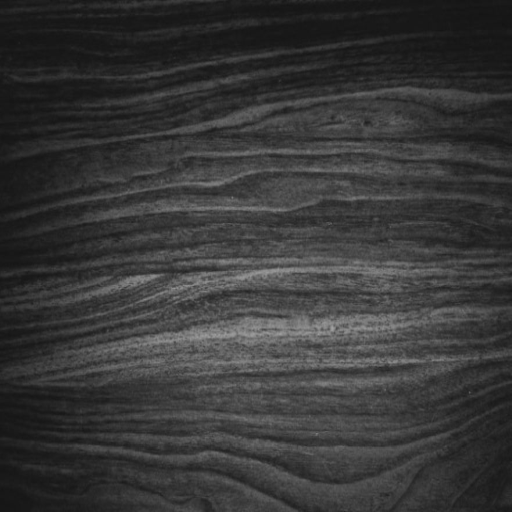

time: 91 ms


In [82]:
#originalRGB = cv2.imread('frutas.png') #Leer imagen
originalRGB = cv2.imread('madera.png') #Leer imagen
#originalRGB = cv2.imread('poligonos.png') #Leer imagen
#originalRGB = cv2.imread('techo.png') #Leer imagen

if originalRGB is None:
  assert False, 'Imagen no encontrada'

if len(originalRGB.shape) == 3:
  original = cv2.cvtColor(originalRGB, cv2.COLOR_BGR2GRAY)
else:
  original = originalRGB

input = np.float32( original )

print('Piramide de gauss:')
gausspyramid = compute_gauss_pyramid(input, 5)
show_gauss_pyramid(gausspyramid)

print('Piramide de laplace:')
laplacepyramid = compute_laplace_pyramid(input, 5)
show_laplace_pyramid(laplacepyramid)

print('reconstruida:')
reconstr = reconstruct(laplacepyramid)
cv2_imshow(reconstr)